In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.metrics import mean_squared_error

In [5]:
data = pd.read_csv('ccpp.csv')

In [6]:
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


# Data Preprocessing

In [40]:
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [41]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


# Attribute Information 
AT = Temperature ranging from 1.81C to 37.11C

V = Exhaust Vacuum in the range 25.36 to 81.56cm Hg

AP = Ambient Pressure ranging from 992.89 to 1033.30 milibar

RH = Relative Humidity in the range 25.56% to 100.16%

PE = Net hourly electrical energy output 420.26-495.76 MW

In [66]:
x = data[['AT','V','AP','RH']]
y = data['PE']
#to reshape the data
def reshape(list1):
    for i in list1:
        x = data[i].values.reshape(len(data[i]),1)
    return x
X = reshape(x)
y = y.values.reshape(len(y),1)

In [67]:
#Split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0) #70/30 rule

In [70]:
x_train.shape , y_train.shape

((6697, 1), (6697, 1))

In [72]:
y_test.shape, x_test.shape

((2871, 1), (2871, 1))

**To fit the regression model using sklearn.linear_model**

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [85]:
predictions = model.predict(x_train)
predictions

array([[457.776018  ],
       [445.17836668],
       [461.7982681 ],
       ...,
       [460.87144089],
       [456.33178726],
       [462.79258272]])

Text(0.5, 1.0, 'Residual Plot')

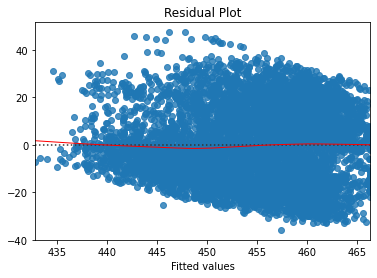

In [92]:
sns.residplot(predictions,y_train,data=data,lowess=True,
             line_kws = {'color':'red','lw':1,'alpha':1})
plt.xlabel("Fitted values")
plt.title("Residual Plot")

2. QQ Plot - To check whether the residuals are normally distributed

Text(0.5, 1.0, 'Normal Q-Q Plot')

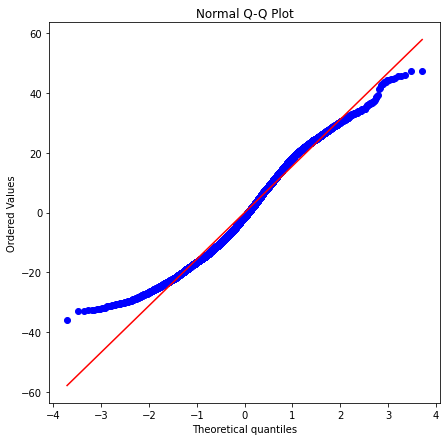

In [108]:
residuals = y_train.reshape(-1) - predictions.reshape(-1)
residuals

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

3. Scale-Location plot - To check homoscedasticity

C:\Users\Alexei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fitted value')

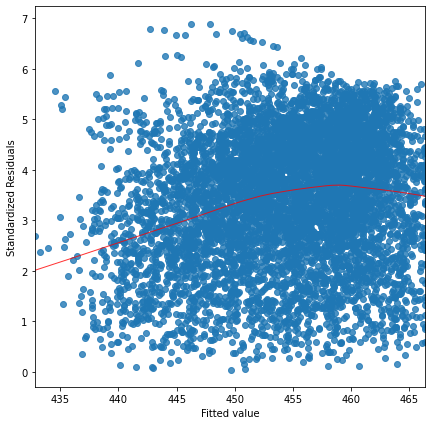

In [109]:
model_norm = np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(predictions.reshape(-1),model_norm,scatter=True,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standardized Residuals")
plt.xlabel("Fitted value")